In [1]:
pip install pmdarima

     -------------------------------------- 572.0/572.0 KB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 987.3/987.3 KB 1.3 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 KB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'F:\Python 3.9.7\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np

In [2]:
import yfinance as yf

In [3]:
stock_data = yf.download('TCS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('LT.NS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('HCL',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('WIPRO.NS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('TECHM.NS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('REDINGTON.NS',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('ITC',start='2012-01-01',end='2022-12-31')
# stock_data = yf.download('CYIENT.NS',start='2012-01-01',end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [8]:
stock_data.index_col='DATE'.parse_dates=True

AttributeError: 'str' object has no attribute 'parse_dates'

In [10]:
stock_data.parse_dates=True

In [4]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-01 00:00:00-04:00,35.000000,37.000000,32.099998,36.200001,33.839130,14667600
2013-11-04 00:00:00-05:00,36.799999,36.799999,34.689999,35.349998,33.044563,1586600
2013-11-05 00:00:00-05:00,35.110001,35.500000,34.820000,35.349998,33.044563,337700
2013-11-06 00:00:00-05:00,35.610001,36.490002,35.610001,35.900002,33.558697,549600
2013-11-07 00:00:00-05:00,36.799999,36.799999,34.119999,35.310001,33.007175,883700


In [5]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23 00:00:00-05:00,4.18,4.32,4.15,4.26,4.26,225000
2022-12-27 00:00:00-05:00,4.23,4.26,4.14,4.21,4.21,319200
2022-12-28 00:00:00-05:00,4.17,4.30,4.13,4.15,4.15,239500
2022-12-29 00:00:00-05:00,4.15,4.35,4.11,4.30,4.30,249400
2022-12-30 00:00:00-05:00,4.21,4.40,4.20,4.31,4.31,447700


In [6]:
stock_data.shape

(2307, 6)

In [7]:
stock_data.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-01 00:00:00-04:00,35.000000,37.000000,32.099998,36.200001,33.839130,14667600
2013-11-04 00:00:00-05:00,36.799999,36.799999,34.689999,35.349998,33.044563,1586600
2013-11-05 00:00:00-05:00,35.110001,35.500000,34.820000,35.349998,33.044563,337700
2013-11-06 00:00:00-05:00,35.610001,36.490002,35.610001,35.900002,33.558697,549600
2013-11-07 00:00:00-05:00,36.799999,36.799999,34.119999,35.310001,33.007175,883700
...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,4.180000,4.320000,4.150000,4.260000,4.260000,225000
2022-12-27 00:00:00-05:00,4.230000,4.260000,4.140000,4.210000,4.210000,319200
2022-12-28 00:00:00-05:00,4.170000,4.300000,4.130000,4.150000,4.150000,239500


<AxesSubplot:xlabel='Date'>

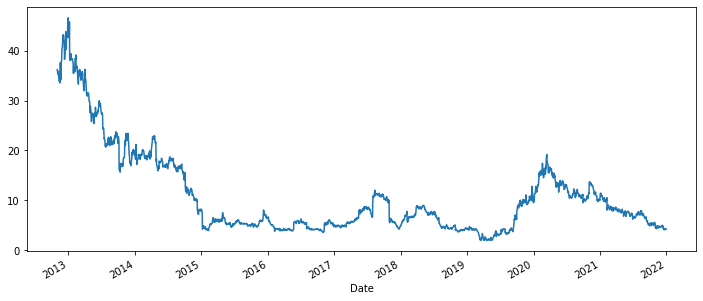

In [8]:
stock_data['Close'].plot(figsize=(12,5))

In [9]:
#check for stationary
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print('1. ADF : ',dftest[0])
    print('2. P-Value : ',dftest[1])
    print('3. Num Of Lags : ',dftest[2])
    print('4. Num of Observation Used for ADF : ',dftest[3])
    print('5. Critical Values : ')
    for key, val in dftest[4].items():
        print('\t',key,':',val)

In [10]:
ad_test(stock_data['Close'])

1. ADF :  -3.931358087976772
2. P-Value :  0.001815813683793003
3. Num Of Lags :  26
4. Num of Observation Used for ADF :  2280
5. Critical Values : 
	 1% : -3.433221349807447
	 5% : -2.862808493298208
	 10% : -2.5674452772006773


In [11]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [12]:
stepwise_fit=auto_arima(stock_data['Close'],trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3349.223, Time=1.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3375.658, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3376.819, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3376.655, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3375.403, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3367.145, Time=1.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3365.198, Time=0.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3350.736, Time=1.92 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3350.573, Time=2.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3374.249, Time=0.56 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3362.126, Time=1.84 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3367.194, Time=0.35 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3349.186, Time=3.05 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3350.309, Time=3.53 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2307
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -1666.593
Date:                Sun, 19 Feb 2023   AIC                           3349.186
Time:                        17:36:37   BIC                           3395.132
Sample:                             0   HQIC                          3365.935
                               - 2307                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0106      0.009     -1.117      0.264      -0.029       0.008
ar.L1          0.6144      0.209      2.940      0.003       0.205       1.024
ar.L2         -0.9909      0.004   -232.149      0.000      -0.999      -0.983
ar.L3          0.6070      0.206      2.947      0.003       0.203       1.011
ma.L1         -0.6400      0.204     -3.135      0.002      -1.040      -0.240
ma.L2          0.9637      0.008    115.055      0.000       0.947       0.980
ma.L3         -0.6206      0.195     -3.177      0.001      -1.004      -0.238
sigma2         0.2484      0.002    105.087      0.000       0.244       0.253
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             69430.63
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -1.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
from statsmodels.tsa.arima.model import ARIMA as ARIMA2

In [14]:
stock_data.shape

(2307, 6)

In [15]:
train=stock_data.iloc[:-80]
test=stock_data.iloc[-20:]
print(train.shape,test.shape)

(2227, 6) (20, 6)


In [17]:
#train the model
model=ARIMA2(train['Close'],order=(3,1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2227
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1643.095
Date:                Sun, 19 Feb 2023   AIC                           3300.190
Time:                        17:37:32   BIC                           3340.146
Sample:                             0   HQIC                          3314.781
                               - 2227                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6079      0.231      2.637      0.008       0.156       1.060
ar.L2         -0.9886      0.005   -194.051      0.000      -0.999      -0.979
ar.L3          0.6002      0.227      2.647      0.008       0.156       1.045
ma.L1         -0.6317      0.226     -2.797      0.005      -1.074      -0.189
ma.L2          0.9602      0.010    100.995      0.000       0.942       0.979
ma.L3         -0.6118      0.215     -2.842      0.004      -1.034      -0.190
sigma2         0.2562      0.002    106.466      0.000       0.251       0.261
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             64258.86
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -1.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
#testing
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=stock_data.index[start:end+1]
print(pred)

Date
2022-09-08 00:00:00-04:00    6.566616
2022-09-09 00:00:00-04:00    6.598592
2022-09-12 00:00:00-04:00    6.595274
2022-09-13 00:00:00-04:00    6.565617
2022-09-14 00:00:00-04:00    6.570060
2022-09-15 00:00:00-04:00    6.600087
2022-09-16 00:00:00-04:00    6.596150
2022-09-19 00:00:00-04:00    6.566739
2022-09-20 00:00:00-04:00    6.570773
2022-09-21 00:00:00-04:00    6.599938
2022-09-22 00:00:00-04:00    6.596028
2022-09-23 00:00:00-04:00    6.567240
2022-09-26 00:00:00-04:00    6.571109
2022-09-27 00:00:00-04:00    6.599573
2022-09-28 00:00:00-04:00    6.595774
2022-09-29 00:00:00-04:00    6.567648
2022-09-30 00:00:00-04:00    6.571389
2022-10-03 00:00:00-04:00    6.599187
2022-10-04 00:00:00-04:00    6.595508
2022-10-05 00:00:00-04:00    6.568036
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

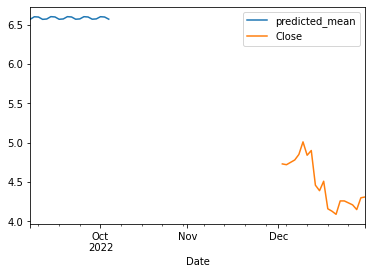

In [21]:
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [22]:
test['Close'].mean()

4.49050006866455

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [24]:
rmse=sqrt(mean_squared_error(pred,test['Close']))

In [25]:
print(rmse)

2.11318612638245


In [26]:
model2=ARIMA2(stock_data['Close'],order=(1,1,3))
model2=model2.fit()

In [27]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23 00:00:00-05:00,4.18,4.32,4.15,4.26,4.26,225000
2022-12-27 00:00:00-05:00,4.23,4.26,4.14,4.21,4.21,319200
2022-12-28 00:00:00-05:00,4.17,4.30,4.13,4.15,4.15,239500
2022-12-29 00:00:00-05:00,4.15,4.35,4.11,4.30,4.30,249400
2022-12-30 00:00:00-05:00,4.21,4.40,4.20,4.31,4.31,447700


In [28]:
pred=model2.predict(start=len(stock_data),end=len(stock_data)+30,typ='levels').rename('ARIMA Predictions')

In [29]:
print(pred)

2307    4.299484
2308    4.298829
2309    4.298828
2310    4.298828
2311    4.298828
2312    4.298828
2313    4.298828
2314    4.298828
2315    4.298828
2316    4.298828
2317    4.298828
2318    4.298828
2319    4.298828
2320    4.298828
2321    4.298828
2322    4.298828
2323    4.298828
2324    4.298828
2325    4.298828
2326    4.298828
2327    4.298828
2328    4.298828
2329    4.298828
2330    4.298828
2331    4.298828
2332    4.298828
2333    4.298828
2334    4.298828
2335    4.298828
2336    4.298828
2337    4.298828
Name: ARIMA Predictions, dtype: float64


ValueError: could not convert string to Timestamp